Data Visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
import pickle
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# load the model from disk
filename = '../models/svm_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))


In [10]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("../data/processed/predictive_maintenance.csv").set_index("UDI")
target=df.pop('Target')
df.insert(0, 'Target',target)

In [11]:
df

,Target,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
UDI,,,,,,,,,
1,0,298.1,308.6,1551,42.8,0,0,0,1
2,0,298.2,308.7,1408,46.3,3,0,1,0
3,0,298.1,308.5,1498,49.4,5,0,1,0
4,0,298.2,308.6,1433,39.5,7,0,1,0
5,0,298.2,308.7,1408,40.0,9,0,1,0
...,...,...,...,...,...,...,...,...,...
9996,0,298.8,308.4,1604,29.5,14,0,0,1
9997,0,298.9,308.4,1632,31.8,17,1,0,0
9998,0,299.0,308.6,1645,33.4,22,0,0,1


In [12]:
train, test = train_test_split(df, test_size=0.33, random_state=42)

to_model_columns= train.columns[1::]
X_train = train[to_model_columns]
Y_train = train.Target
X_test = test[to_model_columns]
Y_test = test.Target

loaded_model.score(X_test, Y_test)

0.9881818181818182

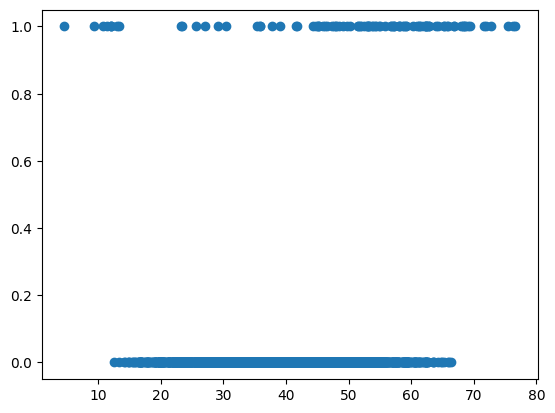

In [13]:
plt.scatter(X_test["Torque [Nm]"], Y_test)

In [4]:
machines_H = df[df['Type_H'] == 1]
machines_L = df[df['Type_L'] == 1]
machines_M = df[df['Type_M'] == 1]

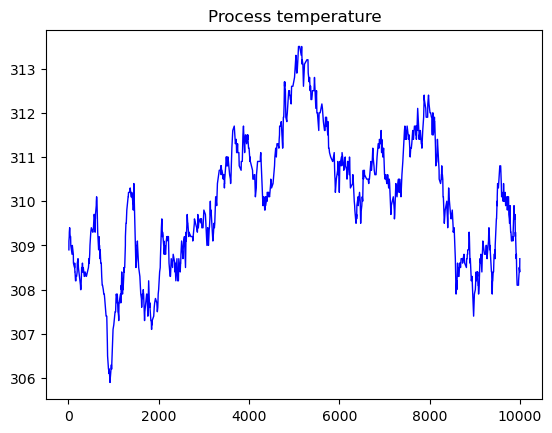

In [5]:
plt.plot(machines_H['Process temperature [K]'], label='Process temperature [K]', color='blue', animated = True, linewidth=1)
plt.title('Process temperature')
plt.show()

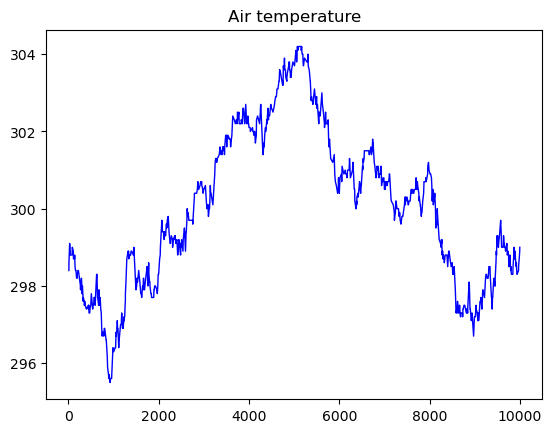

In [6]:
plt.plot(machines_H['Air temperature [K]'], label='Air temperature [K]', color='blue', animated = True, linewidth=1)
plt.title('Air temperature')
plt.show()

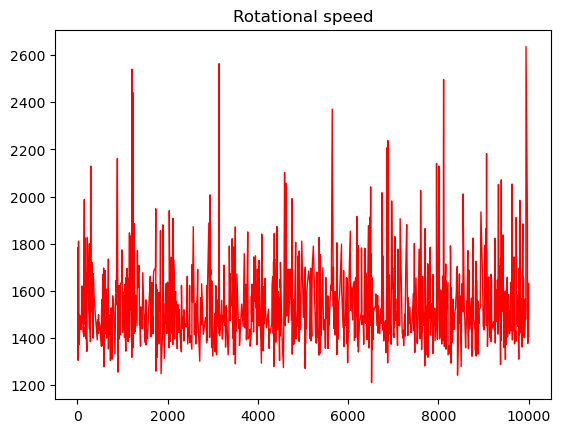

In [7]:
plt.plot(machines_H['Rotational speed [rpm]'], label='Rotational speed [rpm]', color='red', animated = True, linewidth=1)
plt.title('Rotational speed')
plt.show()

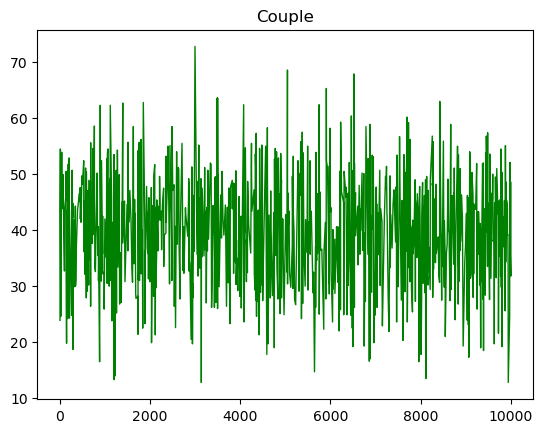

In [8]:
plt.plot(machines_H['Torque [Nm]'], label='Torque [Nm]', color='green', animated = True, linewidth=1)
plt.title('Couple')
plt.show()

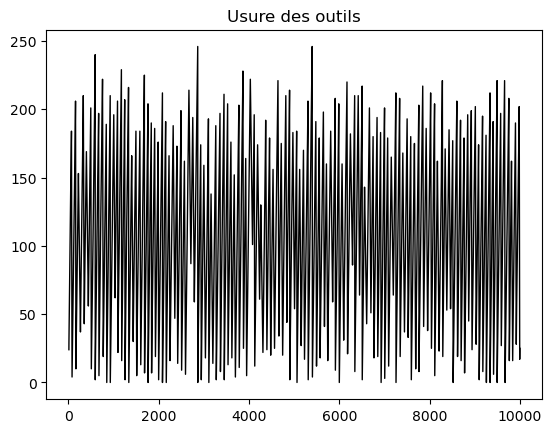

In [9]:
plt.plot(machines_H['Tool wear [min]'], label='Tool wear [min]', color='black', animated = True, linewidth=1)
plt.title('Usure des outils')
plt.show()

In [ ]:
set(df['Failure Type'])
# remarque : en enlevant les aberrations, ça supprime toutes les machines qui ont une autre panne que panne aléatoire

In [ ]:
X = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = df['Failure Type']

Use Shaplay